In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import poisson
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['image.cmap'] = 'bwr'
cmap = cm.get_cmap()

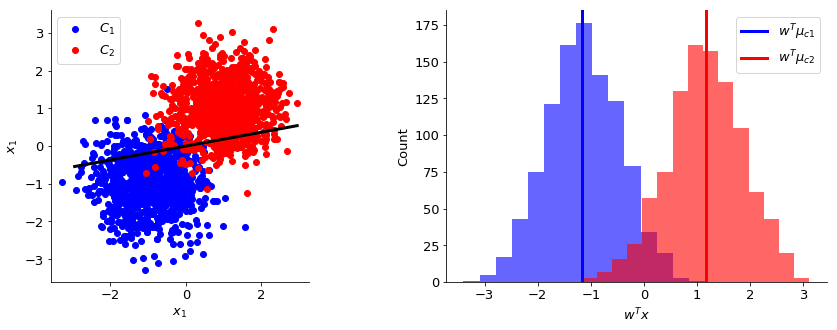

In [2]:
n = 1000;
var = 0.5
muC1 = np.array([-1., -1.])
covC1 = np.diag(np.array([var, var]))
muC2 = np.array([1., 1.])
covC2 = np.diag(np.array([var, var]))

XC1 = np.random.multivariate_normal(muC1, covC1, n)
XC2 = np.random.multivariate_normal(muC2, covC2, n)

w = np.random.randn(2, 1)
w /= np.linalg.norm(w)
z1 = np.dot(XC1, w)
z2 = np.dot(XC2, w)

fh = plt.figure(figsize=(15, 5))
ah = fh.add_subplot(1, 2, 1)
phC1 = ah.plot(XC1[:, 0], XC1[:, 1], 'o', color=cmap(0.)[0:3], label='$C_1$')
phC2 = ah.plot(XC2[:, 0], XC2[:, 1], 'o', color=cmap(1.)[0:3], label='$C_2$')
ah.plot([-3*w[0], 3*w[0]], [-3*w[1], 3*w[1]], 'k-', lw=3)
plt.legend(handles=phC1+phC2)
ah.set_aspect('equal')
ah.set_xlabel('$x_1$')
ah.set_ylabel('$x_1$')
ah = fh.add_subplot(1, 2, 2)
ah.hist(z1, 15, color=cmap(0.)[0:3], alpha=0.6)
ah.hist(z2, 15, color=cmap(1.)[0:3], alpha=0.6)
lhC1 = ah.axvline(x=np.dot(w.T, muC1), lw=3, color=cmap(0.)[0:3], label='$w^T\mu_{c1}$')
lhC2 = ah.axvline(x=np.dot(w.T, muC2), lw=3, color=cmap(1.)[0:3], label='$w^T\mu_{c2}$')
ah.set_xlabel('$w^Tx$')
ah.set_ylabel('Count')
plt.legend(handles=[lhC1, lhC2])
plt.show()

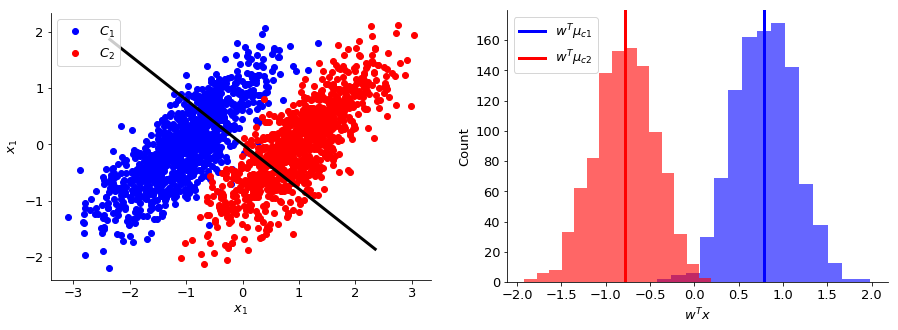

In [3]:
n = 1000;
var = 0.5
cov = 0.4
muC1 = np.array([-1., 0.])
covC1 = np.array([[var, cov],[cov, var]])
muC2 = np.array([1., 0.])
covC2 = np.array([[var, cov],[cov, var]])

XC1 = np.random.multivariate_normal(muC1, covC1, n)
XC2 = np.random.multivariate_normal(muC2, covC2, n)
X = np.vstack([XC1, XC2])
y = np.vstack([-1*np.ones([n, 1]), 1*np.ones([n, 1])])

#w = muC1 - muC2  # maximizes the separation of the means
w = np.dot(np.linalg.inv(np.cov(XC1.T)+np.cov(XC2.T)), muC1 - muC2)  # Fisher LDA
w /= np.linalg.norm(w)
z1 = np.dot(XC1, w)
z2 = np.dot(XC2, w)

fh = plt.figure(figsize=(15, 5))
ah = fh.add_subplot(1, 2, 1)
phC1 = ah.plot(XC1[:, 0], XC1[:, 1], 'o', color=cmap(0.)[0:3], label='$C_1$')
phC2 = ah.plot(XC2[:, 0], XC2[:, 1], 'o', color=cmap(1.)[0:3], label='$C_2$')
ah.plot([-3*w[0], 3*w[0]], [-3*w[1], 3*w[1]], 'k-', lw=3)
plt.legend(handles=phC1+phC2)
ah.set_aspect('equal')
ah.set_xlabel('$x_1$')
ah.set_ylabel('$x_1$')
ah = fh.add_subplot(1, 2, 2)
ah.hist(z1, 15, color=cmap(0.)[0:3], alpha=0.6)
ah.hist(z2, 15, color=cmap(1.)[0:3], alpha=0.6)
lhC1 = ah.axvline(x=np.dot(w.T, muC1), lw=3, color=cmap(0.)[0:3], label='$w^T\mu_{c1}$')
lhC2 = ah.axvline(x=np.dot(w.T, muC2), lw=3, color=cmap(1.)[0:3], label='$w^T\mu_{c2}$')
ah.set_xlabel('$w^Tx$')
ah.set_ylabel('Count')
plt.legend(handles=[lhC1, lhC2])
plt.show()


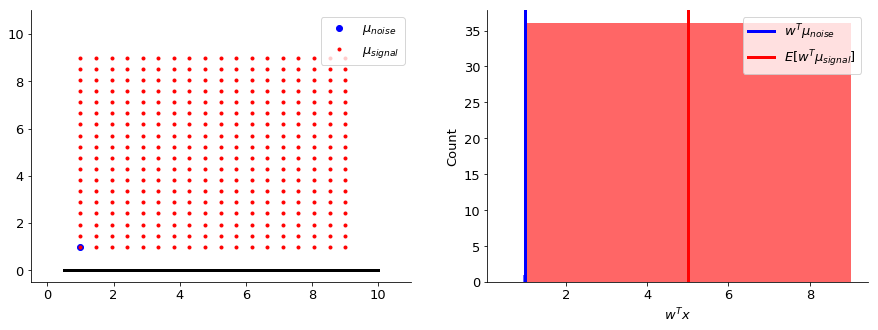

In [89]:
muNoise = np.array([1., 1.])
muX1, muX2 = np.meshgrid(np.linspace(1., 9., 18), np.linspace(1., 9., 18))
muSignal = np.vstack([muX1.ravel(), muX2.ravel()]).T
muDiff = np.abs(muSignal[:, 0] - muSignal[:, 1])
#muSignal = muSignal[muDiff <=2]

w = np.array([1., 0.])
w /= np.linalg.norm(w)
zNoise = np.dot(muNoise, w)
zSignal = np.dot(muSignal, w)

fh = plt.figure(figsize=(15, 5))
ah = fh.add_subplot(1, 2, 1)
phC1 = ah.plot(muNoise[0], muNoise[1], 'o', color=cmap(0.)[0:3], label='$\mu_{noise}$')
phC2 = ah.plot(muSignal[:, 0], muSignal[:, 1], '.', color=cmap(1.)[0:3], label='$\mu_{signal}$')
ah.plot([0.5*w[0], 10*w[0]], [0.5*w[1], 10*w[1]], 'k-', lw=3)
ah.set_xlim([-0.5, 11])
ah.set_ylim([-0.5, 11])
plt.legend(handles=phC1+phC2)
ah = fh.add_subplot(1, 2, 2)
ah.hist(zNoise, 9, color=cmap(0.)[0:3], alpha=0.6)
ah.hist(zSignal, 9, color=cmap(1.)[0:3], alpha=0.6)
lhC1 = ah.axvline(x=np.dot(muNoise, w), lw=3, color=cmap(0.)[0:3], label='$w^T\mu_{noise}$')
lhC2 = ah.axvline(x=np.dot(muSignal, w).mean(), lw=3, color=cmap(1.)[0:3], label='$E[w^T\mu_{signal}]$')
ah.set_xlabel('$w^Tx$')
ah.set_ylabel('Count')
plt.legend(handles=[lhC1, lhC2])
plt.show()

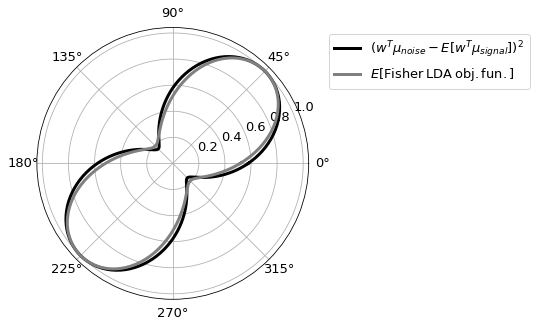

In [90]:
noiseCorr = 0.0*np.sqrt(np.prod(muNoise))
covNoise = np.array([[muNoise[0], noiseCorr], [noiseCorr, muNoise[1]]])
angles = np.linspace(0, 2*np.pi, 361)
expLdaObjFunVal = []
expSqDiffObjFunVal = []

for angle in angles:
    
    w = [np.cos(angle), np.sin(angle)]
    w /= np.linalg.norm(w)
    ldaObjFunTmp = 0.
    sqDiffObjFunTmp = 0.
    
    for i in range(muSignal.shape[0]):
        signalCorr = 0.*np.sqrt(np.prod(muSignal[i, :]))
        covSignal = np.array([[muSignal[i, 0], signalCorr], [signalCorr, muSignal[i, 1]]])
        diff = np.dot(w, muSignal[i, :] - muNoise)
        sqDiff = np.dot(diff, diff)
        scatter = np.dot(w, np.dot(covNoise, w)) + np.dot(w, np.dot(covSignal, w))
        ldaObjFunTmp += sqDiff / scatter
        sqDiffObjFunTmp += sqDiff
        
    expLdaObjFunVal.append(ldaObjFunTmp / muSignal.shape[0])
    expSqDiffObjFunVal.append(sqDiffObjFunTmp / muSignal.shape[0])
        
expLdaObjFunVal = np.array(expLdaObjFunVal)
expLdaObjFunVal /= expLdaObjFunVal.max()
expSqDiffObjFunVal = np.array(expSqDiffObjFunVal)
expSqDiffObjFunVal /= expSqDiffObjFunVal.max()
        
fh = plt.figure(figsize=(7.5, 5))
phSqDiff = plt.polar(angles, expSqDiffObjFunVal, color=[0,0,0], lw=3, label='$(w^T\mu_{noise}-E[w^T\mu_{signal}])^2$')
phLDA = plt.polar(angles, expLdaObjFunVal, color=[0.5, 0.5, 0.5], lw=3, label='$E[\mathrm{Fisher\:LDA\:obj. fun.}]$')
plt.legend(handles=phSqDiff+phLDA, bbox_to_anchor=(1.05, 1));

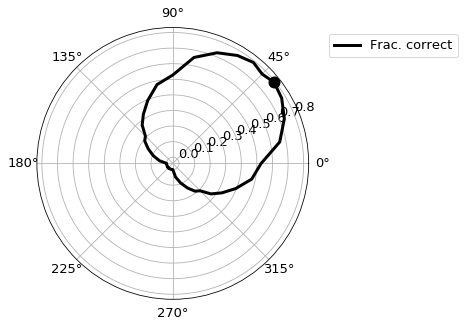

In [93]:
res = 5
w1Vals = np.hstack([np.arange(-res, res), res*np.ones(2*res), np.arange(res, -res, -1), -res*np.ones(2*res+1)])
w2Vals = np.hstack([-res*np.ones(2*res), np.arange(-res, res), res*np.ones(2*res), np.arange(res, -res-1, -1)])
angles = np.angle(w1Vals+1j*w2Vals, deg=True)
angles[angles<0] = 360 + angles[angles<0]
cRatio = []
nSamples = 500
nNull = 50

rNoise = [np.random.poisson(muNoise, [nSamples, 2]) for i in range(nNull)]
for w1, w2 in zip(w1Vals, w2Vals):
    
    w = [w1, w2]
    zNoise = [np.dot(r, w) for r in rNoise]
    cRatioTmp = 0
    
    for j in range(muSignal.shape[0]):
        rSignal = np.random.poisson(muSignal[j, :], [nSamples, 2])
        zSignal = np.dot(rSignal, w)
        signalLarger = np.ones(zSignal.shape)
        for z in zNoise:
            signalLarger *= zSignal > z
        cRatioTmp += np.mean(signalLarger)
        
    cRatio.append(cRatioTmp / muSignal.shape[0])
        
cRatio = np.array(cRatio)
        
fh = plt.figure(figsize=(7.5, 5))
ph = plt.polar(np.deg2rad(angles), cRatio, color=[0,0,0], lw=3, label='Frac. correct')
plt.polar(np.deg2rad(angles[cRatio.argmax()]), cRatio.max(), marker='o', ms=11, color=[0.,0,0], lw=3)
plt.legend(handles=ph, bbox_to_anchor=(1.05, 1));

In [7]:
def getSignalLargerProb(muNoise, muSignal, nNoise, same=False):
    
    kMaxVal = np.stack([muNoise, muSignal]).max()
    kMax = int(kMaxVal + 5*np.sqrt(kMaxVal))
    pNoise = poisson.pmf(np.arange(kMax), muNoise)
    pSignal = poisson.pmf(np.arange(kMax), muSignal)
    
    p = 0
    if same:
        p += np.dot(pNoise, pSignal)
    for i in range(1, int(kMax)):
        p += pSignal[i]*np.sum(pNoise[0:i])**nNoise;
        
    return p

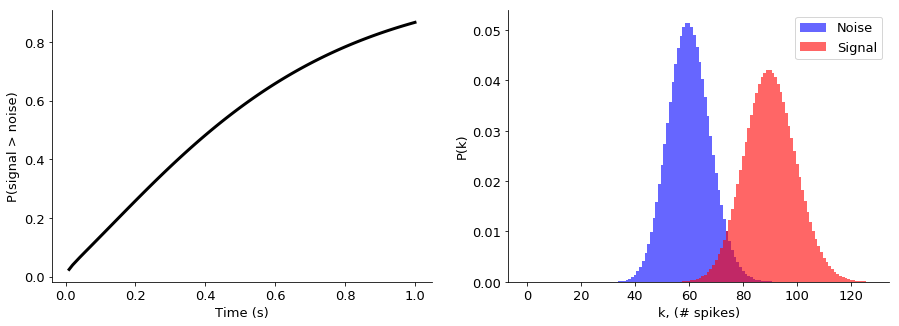

In [8]:
dt = 0.01
noise = 20
signal = 30
nFrames = 100
nNull = 50
initSum = 0
nCells = 3

p = np.zeros([nFrames, 1])
noiseCum = np.cumsum(nCells*dt*noise*np.ones([nFrames, 1])) + initSum
signalCum = np.cumsum(nCells*dt*signal*np.ones([nFrames, 1])) + initSum

for i in range(nFrames):
    p[i] = getSignalLargerProb(noiseCum[i], signalCum[i], nNull)
    
fh = plt.figure(figsize=(15, 5))
ah = fh.add_subplot(1, 2, 1)
ah.plot(np.arange(1, nFrames+1)*dt, p, 'k-', lw=3)
ah.set_xlabel('Time (s)')
ah.set_ylabel('P(signal > noise)')
kMax = np.int64(nCells*dt*nFrames*np.array([noise, signal]).max()) + initSum
kValMax = kMax + 4*np.sqrt(kMax)
kVals = np.arange(kValMax)
ah = fh.add_subplot(1, 2, 2)
bhNoise = ah.bar(kVals, poisson.pmf(kVals, nCells*dt*nFrames*noise+initSum), 1, color=cmap(0.)[0:3], alpha=0.6, label='Noise')
bhSignal = ah.bar(kVals, poisson.pmf(kVals, nCells*dt*nFrames*signal+initSum), 1, color=cmap(1.)[0:3], alpha=0.6, label='Signal')
ah.set_xlabel('k, (# spikes)')
ah.set_ylabel('P(k)')
plt.legend(handles=[bhNoise, bhSignal]);

Text(0,0.5,u'P(signal > noise)')

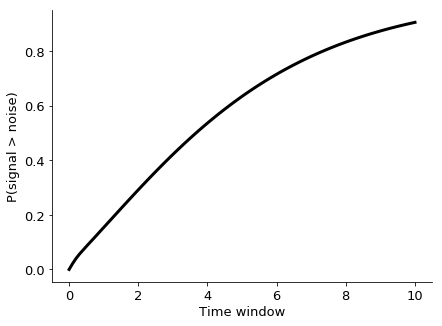

In [9]:
dt = 0.01
noise = 1
signal = 3
nNull = 50
timeWinSizes = np.linspace(1e-2, 10, 100)

p = np.zeros([timeWinSizes.size, 1])
for i in range(nFrames):
    noiseTmp = 2*noise*timeWinSizes[i]
    signalTmp = noise*timeWinSizes[i] + signal*timeWinSizes[i]
    p[i] = getSignalLargerProb(noiseTmp, signalTmp, nNull)

fh = plt.figure(figsize=(15, 5))
ah = fh.add_subplot(1, 2, 1)
ah.plot(timeWinSizes, p, 'k-', lw=3)
ah.set_xlabel('Time window')
ah.set_ylabel('P(signal > noise)')